In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Visualizing the dataset

In [2]:
df = pd.read_csv("systemresources-deeplearning-1000.csv")
X = df.iloc[:, 2:].to_numpy() #taking ram, network and disk usage as features
Y = df.iloc[:, 1].to_numpy() #target is cpu

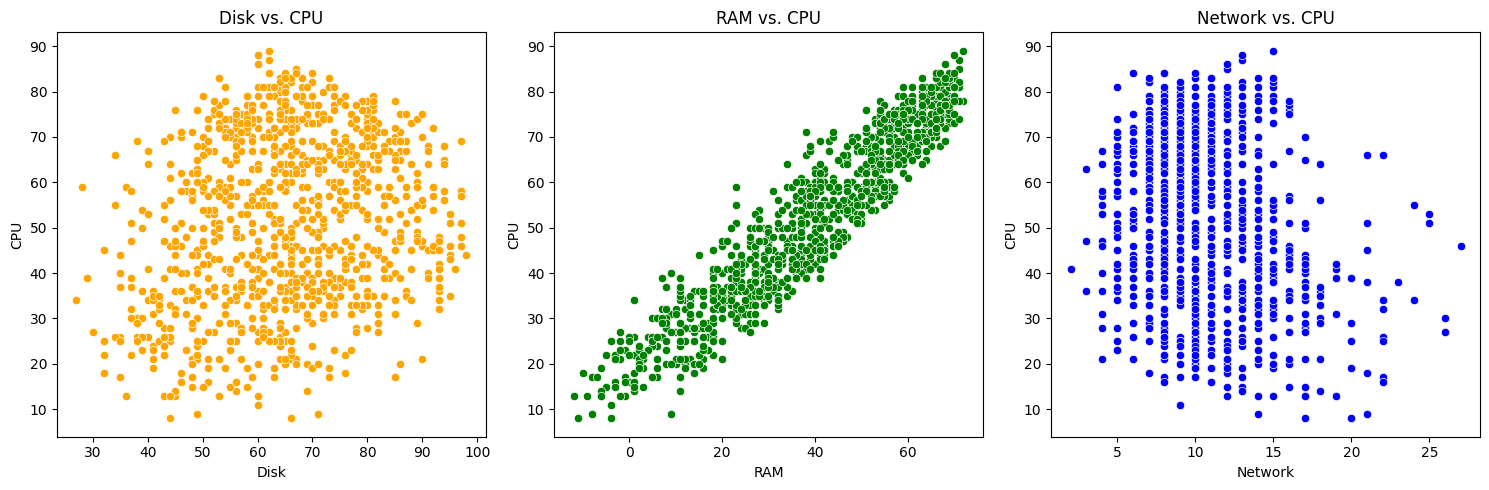

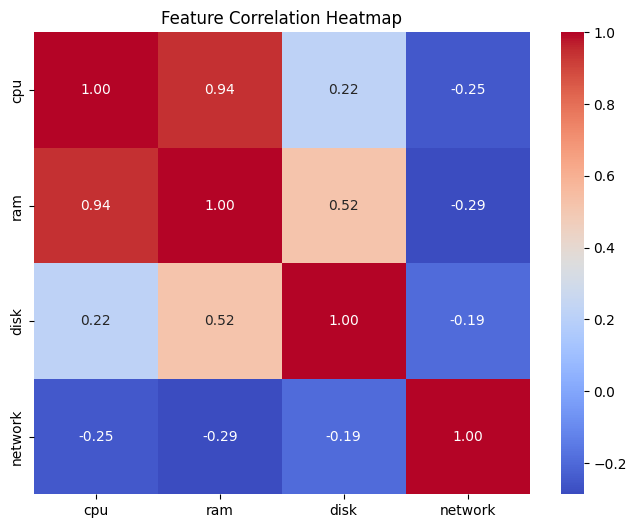

In [3]:
import seaborn as sns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['disk'], y=df['cpu'], color='orange')
plt.title('Disk vs. CPU')
plt.xlabel('Disk')
plt.ylabel('CPU')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['ram'], y=df['cpu'], color='green')
plt.title('RAM vs. CPU')
plt.xlabel('RAM')
plt.ylabel('CPU')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['network'], y=df['cpu'], color='blue')
plt.title('Network vs. CPU')
plt.xlabel('Network')
plt.ylabel('CPU')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = df[['cpu', 'ram', 'disk', 'network']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Applying Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Root Mean Squared Error: 1.9811938910055833
Mean Squared Error: 3.9251292337578434
R² Score: 0.9883412291541125


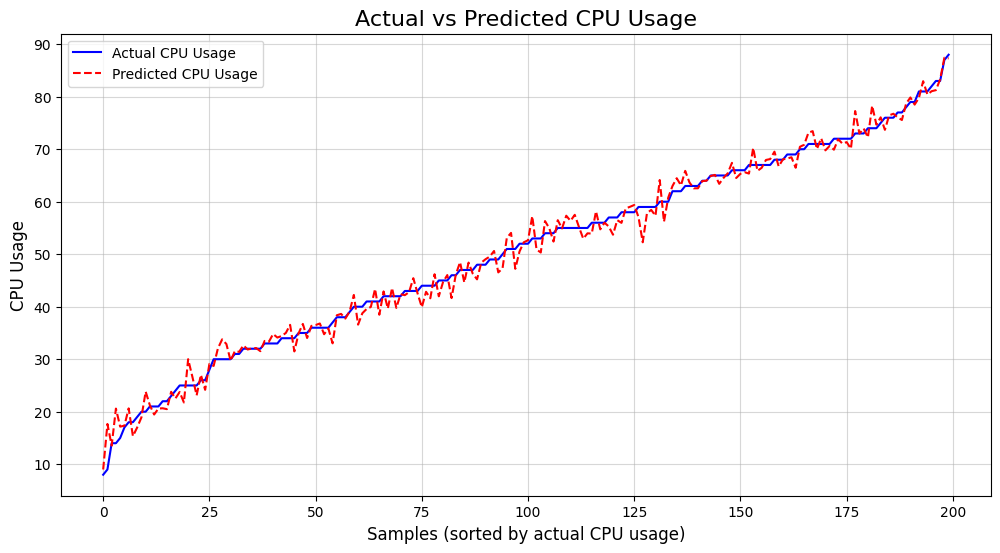

In [8]:
sorted_indices = np.argsort(y_test)  # Sort based on actual values
y_test_sorted = y_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.figure(figsize=(12, 6))

plt.plot(y_test_sorted, label="Actual CPU Usage", linestyle='-', color='blue')
plt.plot(y_pred_sorted, label="Predicted CPU Usage", linestyle='--', color='red')

plt.title('Actual vs Predicted CPU Usage', fontsize=16)
plt.xlabel('Samples (sorted by actual CPU usage)', fontsize=12)
plt.ylabel('CPU Usage', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)

plt.show()

# Applying Polynomial transformation to the data

In [14]:
from sklearn.preprocessing import PolynomialFeatures
rmse_train = []
r2_train = []

rmse_test = []
r2_test = []

for k in range(2,20):
  poly = PolynomialFeatures(degree=k)
  x_train_poly = poly.fit_transform(X_train)
  x_test_poly = poly.fit_transform(X_test)

  reg_w_poly = LinearRegression()
  reg_w_poly.fit(x_train_poly, y_train)

  y_train_pred2 = reg_w_poly.predict(x_train_poly)
  y_test_pred2 = reg_w_poly.predict(x_test_poly)

  rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred2)))
  r2_train.append(r2_score(y_train, y_train_pred2))

  rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred2)))
  r2_test.append(r2_score(y_test, y_test_pred2))

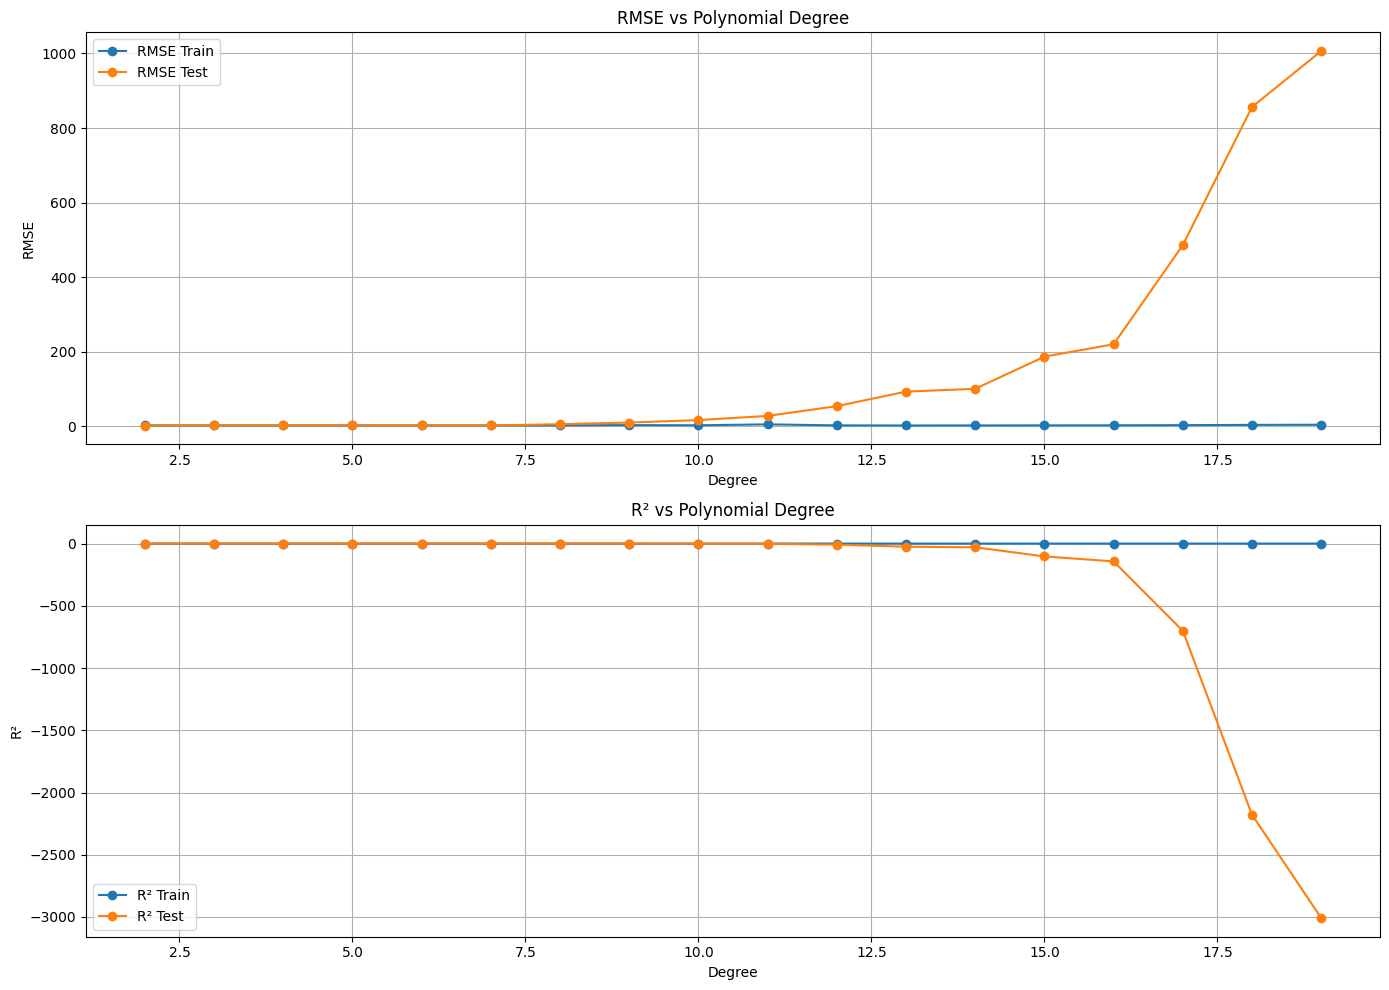

In [18]:
degrees = list(range(2, 20))
plt.figure(figsize=(14, 10))

plt.subplot(2, 1,1)
plt.plot(degrees, rmse_train, label='RMSE Train', marker='o')
plt.plot(degrees, rmse_test, label='RMSE Test', marker='o')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.subplot(2, 1,2)
plt.plot(degrees, r2_train, label='R² Train', marker='o')
plt.plot(degrees, r2_test, label='R² Test', marker='o')
plt.title('R² vs Polynomial Degree')
plt.xlabel('Degree')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
best_rmse_test_idx = np.argmin(rmse_test)
best_rmse_degree = best_rmse_test_idx + 2
best_r2_test_idx = np.argmax(r2_test)
best_r2_degree = best_r2_test_idx + 2

print(f"Best RMSE on Test Set: {rmse_test[best_rmse_test_idx]:.4f} (Degree: {best_rmse_degree})")
print(f"Best R² on Test Set: {r2_test[best_r2_test_idx]:.4f} (Degree: {best_r2_degree})")

Best RMSE on Test Set: 1.8477 (Degree: 2)
Best R² on Test Set: 0.9899 (Degree: 2)


So seems like polynomial with degree 2 kinda performs a little better